In [1]:
pip install mne

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install mne_bids

Note: you may need to restart the kernel to use updated packages.


In [3]:
import mne
from mne.datasets import sample
from mne_bids import BIDSPath, read_raw_bids, print_dir_tree, make_report

bids_path = BIDSPath(
    root='/Users/sophi/Documents/Parkinsons mini',
    subject='001',  # subject ID
    task='PassiveViewing',  # task name
    datatype='eeg', 
    suffix='eeg'  # file suffix, based on your filename
)

/var/folders/b_/l9r7jm_j6_j9nf2t2vl7_2jr0000gn/T/ipykernel_64111/64900576.py:1: RuntimeWarning: No coordinate information found for channels ['VEOG_lower', 'HEOG_left', 'HEOG_right']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_bids(bids_path, verbose=False)
/var/folders/b_/l9r7jm_j6_j9nf2t2vl7_2jr0000gn/T/ipykernel_64111/64900576.py:1: RuntimeWarning: Not setting positions of 3 misc channels found in montage:
['VEOG_lower', 'HEOG_left', 'HEOG_right']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_bids(bids_path, verbose=False)


Reading 0 ... 5119379  =      0.000 ...  5119.379 secs...


/var/folders/b_/l9r7jm_j6_j9nf2t2vl7_2jr0000gn/T/ipykernel_64111/64900576.py:1: RuntimeWarning: There are channels without locations (n/a) that are not marked as bad: ['VEOG_lower', 'HEOG_left', 'HEOG_right']
  raw = read_raw_bids(bids_path, verbose=False)
/var/folders/b_/l9r7jm_j6_j9nf2t2vl7_2jr0000gn/T/ipykernel_64111/64900576.py:1: RuntimeWarning: Not setting positions of 3 misc channels found in montage:
['VEOG_lower', 'HEOG_left', 'HEOG_right']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_bids(bids_path, verbose=False)
/var/folders/b_/l9r7jm_j6_j9nf2t2vl7_2jr0000gn/T/ipykernel_64111/64900576.py:1: RuntimeWarning: participants.tsv file not found for /Users/sophi/Documents/Parkinsons mini/sub-001/eeg/sub-001_task-PassiveViewing_eeg.vhdr
  raw = read_raw_bids(bids_path, verbose=False)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 3301 samples (3.301 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    6.6s finished


Used Annotations descriptions: ['New Segment/', 'Stimulus/S 11', 'Stimulus/S 21', 'Stimulus/S 95', 'Stimulus/S 99', 'Stimulus/S111', 'Stimulus/S112', 'Stimulus/S113', 'Stimulus/S114', 'Stimulus/S115', 'Stimulus/S116', 'Stimulus/S117', 'Stimulus/S118', 'Stimulus/S121', 'Stimulus/S122', 'Stimulus/S123', 'Stimulus/S124', 'Stimulus/S125', 'Stimulus/S126', 'Stimulus/S127', 'Stimulus/S128', 'Stimulus/S211', 'Stimulus/S212', 'Stimulus/S213', 'Stimulus/S214', 'Stimulus/S215', 'Stimulus/S216', 'Stimulus/S217', 'Stimulus/S218', 'Stimulus/S221', 'Stimulus/S222', 'Stimulus/S223', 'Stimulus/S224', 'Stimulus/S225', 'Stimulus/S226', 'Stimulus/S227', 'Stimulus/S228']
Events: [[      0       0   99999]
 [   8151       0      95]
 [   9680       0      21]
 ...
 [5096366       0     124]
 [5097383       0     224]
 [5098825       0      99]]


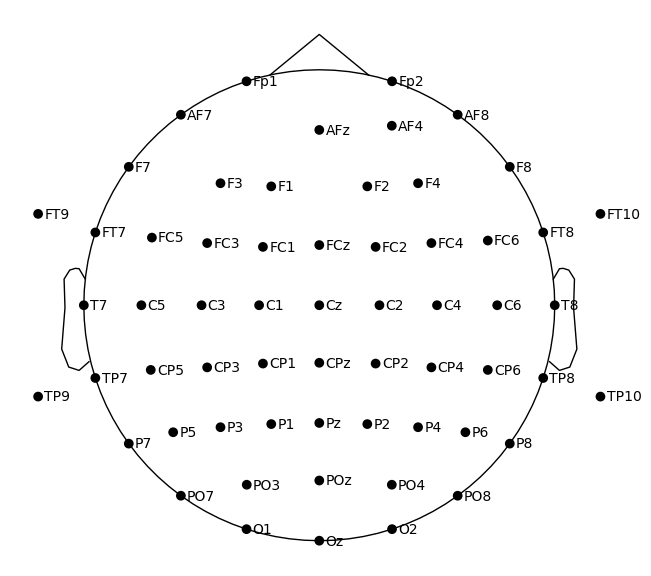

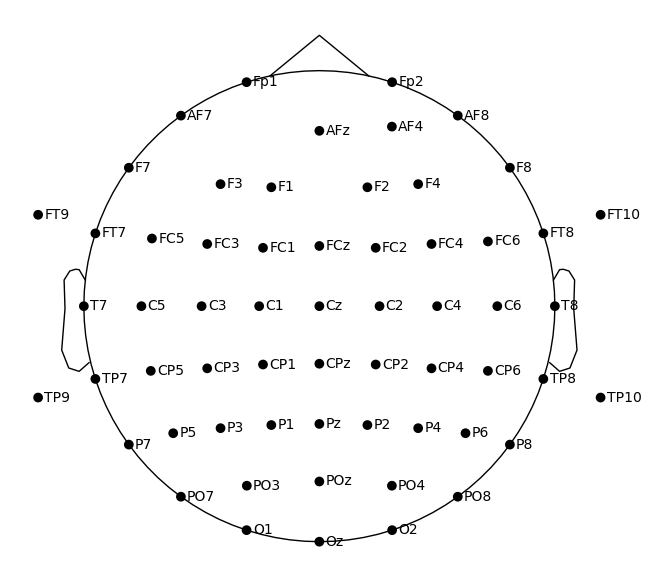

In [4]:
import mne

# Load raw data from a BIDS dataset
# 'bids_path' should be the path to your BIDS directory or specific file.
raw = read_raw_bids(bids_path, verbose=False)
# The 'read_raw_bids' function reads the raw EEG data in the BIDS format.

# Load the data into memory for processing
raw.load_data()
# The 'load_data' method loads the EEG data into memory, making it ready for further analysis.

# Apply a bandpass filter to the data
raw.filter(1, 40, fir_design='firwin')
# This applies a bandpass filter to the data with a frequency range from 1 Hz to 40 Hz.
# 'firwin' specifies that the filter should be designed using a finite impulse response (FIR) filter.
# This step is often done to remove noise and artifacts outside the frequency band of interest (e.g., alpha, beta, and theta rhythms).

# Extract events from the raw data using annotations
events, event_id = mne.events_from_annotations(raw)
# The 'events_from_annotations' function extracts event markers (stimulus/response triggers) from the raw data annotations.
# 'events' is a list of event times, and 'event_id' is a dictionary mapping event names to their corresponding codes.

# Print the extracted events for inspection
print("Events:", events)
# This prints the extracted events, showing the time points and event IDs.

# List all the channel names in the raw data
raw.info['ch_names']
# 'raw.info['ch_names']' returns a list of all channel names in the dataset, such as EEG channels, EOG channels, etc.

# Plot the sensor locations (electrode positions) on the scalp
raw.plot_sensors(show_names=True)
# 'plot_sensors' visualizes the electrode positions on the scalp.
# The 'show_names=True' argument displays the names of the channels on the plot.


In [13]:
# List all the channel names in the raw data
raw.info['ch_names']
# 'raw.info['ch_names']' returns a list of all channel names in the dataset, such as EEG channels, EOG channels, etc.
# This allows you to see all the channels that are available in the raw EEG data.

# Define a list of channels you are interested in analyzing
channels_of_interest = ['Fp1', 'Fp2', 'F7', 'F3', 'F4', 'F8', 'T7', 'C3', 'Cz', 'C4', 'T8', 'P7', 'P3', 'Pz', 'P4', 'P8', 'O1', 'O2']
# 'channels_of_interest' is a list of specific electrode names that you want to retain for analysis.
# These typically correspond to electrodes positioned at various locations on the scalp (frontal, central, parietal, etc.).

# Select only the channels of interest from the raw EEG data
raw.pick_channels(channels_of_interest)
# The 'pick_channels()' method is used to select only the specified channels from the raw EEG data.
# After this step, the raw data will only contain the data from the channels listed in 'channels_of_interest'.

# List the channel names again after picking the channels of interest
raw.info['ch_names']
# 'raw.info['ch_names']' is called again to check the current list of channels after the selection.
# This ensures that only the desired channels are retained in the dataset for further processing.

# Create epochs based on the raw data, focusing on a specific event type
epochs = mne.Epochs(raw, events, event_id={'Stimulus/S 11': 11}, tmin=-0.2, tmax=0.5, baseline=(None, 0), preload=True)
# The 'mne.Epochs()' function creates epochs, which are time segments of the EEG data around specific events (stimuli).
# - 'raw': The raw EEG data from which epochs will be extracted.
# - 'events': The events that indicate the start of each epoch (e.g., stimulus markers).
# - 'event_id={'Stimulus/S 11': 11}': Specifies the event type to extract epochs for. Here, it's extracting epochs for the event labeled 'Stimulus/S 11', which corresponds to event code 11.
# - 'tmin=-0.2' and 'tmax=0.5': The time window for each epoch is from -0.2 seconds to +0.5 seconds around the event. This means the epoch starts 0.2 seconds before the stimulus and ends 0.5 seconds after the stimulus.
# - 'baseline=(None, 0)': The baseline correction is applied using the pre-stimulus period (from the start of the epoch until time 0). 'None' means no baseline period is selected before the epoch start.
# - 'preload=True': This loads the data into memory, which allows further analysis to be done more efficiently.


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
320 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 320 events and 701 original time points ...
0 bad epochs dropped


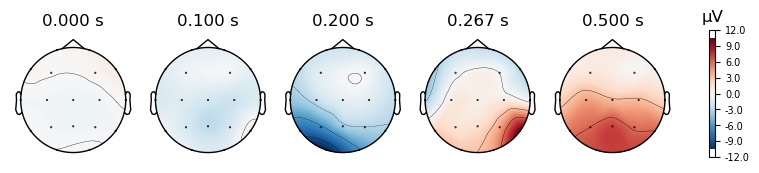

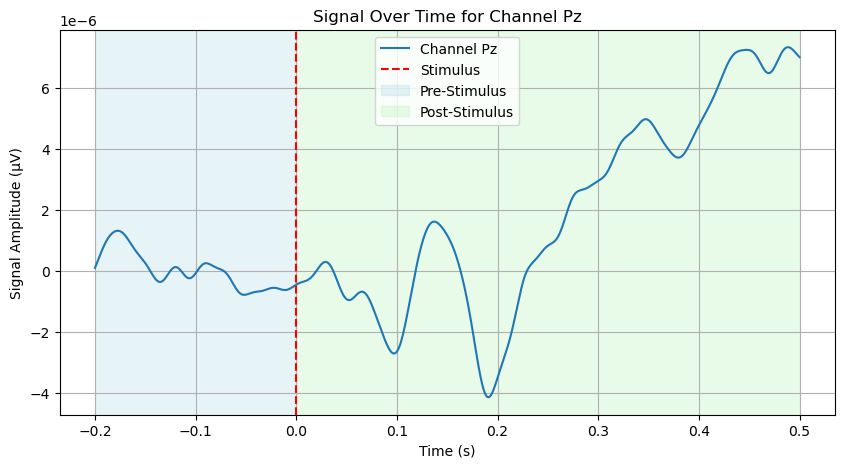

In [15]:
import mne
import matplotlib.pyplot as plt

# Compute the average of all epochs to create an evoked response
evoked = epochs.average()
# 'evoked' represents the average brain response (ERP) to the specified stimulus (e.g., 'Stimulus/S 11').

# Define the specific time points at which to plot topographical maps
times = [0, 0.1, 0.2, 0.267, 0.5]

# Plot the topographical maps at the specified time points
evoked.plot_topomap(times=times, ch_type='eeg', time_unit='s')

# Display the evoked object's info (metadata about the recording)
evoked.info

# Define the channel of interest for plotting the signal
channel_name = 'Pz'  # Replace with the specific channel name of interest
channel_idx = evoked.info['ch_names'].index(channel_name)

# Plot the signal over time for the selected channel
plt.figure(figsize=(10, 5))
plt.plot(evoked.times, evoked.data[channel_idx, :], label=f"Channel {channel_name}")

# Add a vertical line at time = 0 to indicate the stimulus event
plt.axvline(0, color='red', linestyle='--', label='Stimulus')

# Add shading to indicate the pre-stimulus period (e.g., from -0.2 to 0 seconds)
plt.axvspan(evoked.times[0], 0, color='lightblue', alpha=0.3, label='Pre-Stimulus')

# Add shading to indicate the post-stimulus period (e.g., from 0 to 0.5 seconds)
plt.axvspan(0, evoked.times[-1], color='lightgreen', alpha=0.2, label='Post-Stimulus')

# Add plot title and labels
plt.title(f"Signal Over Time for Channel {channel_name}")
plt.xlabel("Time (s)")
plt.ylabel("Signal Amplitude (µV)")  # Assuming the units are in microvolts
plt.legend()
plt.grid(True)
plt.show()


In [17]:
import os

os.getcwd()

'/Users/sophi'